In [1]:
from utz import *
import geopandas as gpd
from njdot.crashes import name_renames
import njdot
from njdot.paths import CC2MC2MN
from njdot import YEARS, Data
from njdot.load import pk_astype, pk_renames

## Load DOT county/muni codes

In [2]:
%%time
data = Data(types=['Accidents'], columns=['County Code', 'County Name', 'Municipality Code', 'Municipality Name'])
c = data.df(index=False)
c = c.value_counts(c.columns.tolist()).sort_index().rename('num').reset_index()
c = c.rename(columns={
    k: v for k, v in {
        'Year': 'year',
        **pk_renames,
        **name_renames,
    }.items()
    if k in c
}).astype(pk_astype)
c['cn'] = c['cn'].str.title()
c['mn'] = c['mn'].str.title()
c = c[['year'] + [k for k in c if k != 'year']]
c

CPU times: user 887 ms, sys: 237 ms, total: 1.12 s
Wall time: 1.02 s


,year,cc,cn,mc,mn,num
0,2001,1,Atlantic,1,Absecon City,312
1,2002,1,Atlantic,1,Absecon City,367
2,2003,1,Atlantic,1,Absecon City,371
3,2004,1,Atlantic,1,Absecon City,322
4,2005,1,Atlantic,1,Absecon City,352
...,...,...,...,...,...,...
11742,2017,21,Warren,23,White Twp,140
11743,2018,21,Warren,23,White Twp,156
11744,2019,21,Warren,23,White Twp,141
11745,2020,21,Warren,23,White Twp,121


Helper that returns:
1. unique sets of values found in `cols`
2. rows from 1. that match all columns but the last

In [3]:
def ambiguous_mappings(df, cols):
    uniqs = (
        df
        #.reset_index()
        [cols]
        .drop_duplicates()
        .sort_values(cols)
    )
    hist = uniqs.value_counts(cols[:-1], sort=False)
    conflicts = hist[hist > 1]
    conflicts = uniqs.set_index(cols[:-1]).loc[conflicts.index].reset_index()
    return uniqs, conflicts

### County Code ⟹ County Name

In [4]:
%%time
cn_cols = [ 'cc', 'cn' ]
cc2cn, county_name_conflicts = ambiguous_mappings(c, cn_cols)
assert len(county_name_conflicts) == 0
cc2cn = cc2cn.set_index('cc')['cn']
assert cc2cn.to_dict() == njdot.data.cc2cn
c.groupby(cn_cols)['num'].sum()

CPU times: user 3.7 ms, sys: 912 µs, total: 4.61 ms
Wall time: 3.85 ms


cc  cn        
1   Atlantic      192238
2   Bergen        656350
3   Burlington    264893
4   Camden        324947
5   Cape May       65356
6   Cumberland     98515
7   Essex         610767
8   Gloucester    155854
9   Hudson        424523
10  Hunterdon      83811
11  Mercer        271333
12  Middlesex     606975
13  Monmouth      416092
14  Morris        325609
15  Ocean         340102
16  Passaic       390426
17  Salem          36922
18  Somerset      237074
19  Sussex         78639
20  Union         425445
21  Warren         71432
Name: num, dtype: int64

### { County Code, Muni Code, Year } ⟹ Muni Name

In [5]:
%%time
mny_keys = [ 'cc', 'mc', 'year' ]
mn_keys = [ 'cc', 'mc' ]
mn_val = 'mn'
mn_cols = mn_keys + [ mn_val ]
mny_cols = mny_keys + [ mn_val ]
mny_uniqs, mny_conflicts = ambiguous_mappings(c, mny_cols)
assert len(mny_conflicts) == 0
mny_uniqs.set_index(mn_cols + ['year'])

CPU times: user 7.26 ms, sys: 1.04 ms, total: 8.3 ms
Wall time: 7.86 ms


Empty DataFrame
Columns: []
Index: [(1, 1, Absecon City, 2001), (1, 1, Absecon City, 2002), (1, 1, Absecon City, 2003), (1, 1, Absecon City, 2004), (1, 1, Absecon City, 2005), (1, 1, Absecon City, 2006), (1, 1, Absecon City, 2007), (1, 1, Absecon City, 2008), (1, 1, Absecon City, 2009), (1, 1, Absecon City, 2010), (1, 1, Absecon City, 2011), (1, 1, Absecon City, 2012), (1, 1, Absecon City, 2013), (1, 1, Absecon City, 2014), (1, 1, Absecon City, 2015), (1, 1, Absecon City, 2016), (1, 1, Absecon City, 2017), (1, 1, Absecon City, 2018), (1, 1, Absecon City, 2019), (1, 1, Absecon City, 2020), (1, 1, Absecon City, 2021), (1, 2, Atlantic City, 2001), (1, 2, Atlantic City, 2002), (1, 2, Atlantic City, 2003), (1, 2, Atlantic City, 2004), (1, 2, Atlantic City, 2005), (1, 2, Atlantic City, 2006), (1, 2, Atlantic City, 2007), (1, 2, Atlantic City, 2008), (1, 2, Atlantic City, 2009), (1, 2, Atlantic City, 2010), (1, 2, Atlantic City, 2011), (1, 2, Atlantic City, 2012), (1, 2, Atlantic City, 2013), (1, 2, Atlantic City, 2014), (1, 2, Atlantic City, 2015), (1, 2, Atlantic City, 2016), (1, 2, Atlantic City, 2017), (1, 2, Atlantic City, 2018), (1, 2, Atlantic City, 2019), (1, 2, Atlantic City, 2020), (1, 2, Atlantic City, 2021), (1, 3, Brigantine City, 2001), (1, 3, Brigantine City, 2002), (1, 3, Brigantine City, 2003), (1, 3, Brigantine City, 2004), (1, 3, Brigantine City, 2005), (1, 3, Brigantine City, 2006), (1, 3, Brigantine City, 2007), (1, 3, Brigantine City, 2008), (1, 3, Brigantine City, 2009), (1, 3, Brigantine City, 2010), (1, 3, Brigantine City, 2011), (1, 3, Brigantine City, 2012), (1, 3, Brigantine City, 2013), (1, 3, Brigantine City, 2014), (1, 3, Brigantine City, 2015), (1, 3, Brigantine City, 2016), (1, 3, Brigantine City, 2017), (1, 3, Brigantine City, 2018), (1, 3, Brigantine City, 2019), (1, 3, Brigantine City, 2020), (1, 3, Brigantine City, 2021), (1, 4, Buena Boro, 2001), (1, 4, Buena Boro, 2002), (1, 4, Buena Boro, 2003), (1, 4, Buena Boro, 2004), (1, 4, Buena Boro, 2005), (1, 4, Buena Boro, 2006), (1, 4, Buena Boro, 2007), (1, 4, Buena Boro, 2008), (1, 4, Buena Boro, 2009), (1, 4, Buena Boro, 2010), (1, 4, Buena Boro, 2011), (1, 4, Buena Boro, 2012), (1, 4, Buena Boro, 2013), (1, 4, Buena Boro, 2014), (1, 4, Buena Boro, 2015), (1, 4, Buena Boro, 2016), (1, 4, Buena Boro, 2017), (1, 4, Buena Boro, 2018), (1, 4, Buena Boro, 2019), (1, 4, Buena Boro, 2020), (1, 4, Buena Boro, 2021), (1, 5, Buena Vista Twp, 2001), (1, 5, Buena Vista Twp, 2002), (1, 5, Buena Vista Twp, 2003), (1, 5, Buena Vista Twp, 2004), (1, 5, Buena Vista Twp, 2005), (1, 5, Buena Vista Twp, 2006), (1, 5, Buena Vista Twp, 2007), (1, 5, Buena Vista Twp, 2008), (1, 5, Buena Vista Twp, 2009), (1, 5, Buena Vista Twp, 2010), (1, 5, Buena Vista Twp, 2011), (1, 5, Buena Vista Twp, 2012), (1, 5, Buena Vista Twp, 2013), (1, 5, Buena Vista Twp, 2014), (1, 5, Buena Vista Twp, 2015), (1, 5, Buena Vista Twp, 2016), ...]

[11747 rows x 0 columns]

### Check NJDOT county/muni codes

#### { County Code, Muni Code } ⟹ Muni Name conflicts

In [6]:
%%time
_, muni_name_conflicts = ambiguous_mappings(c, mn_cols)
muni_name_conflicts.set_index(mn_cols)

CPU times: user 5.23 ms, sys: 1.05 ms, total: 6.28 ms
Wall time: 5.99 ms


Empty DataFrame
Columns: []
Index: [(14, 30, Long Hill Twp), (14, 30, Passaic Twp), (15, 7, Dover Twp), (15, 7, Toms River Twp), (16, 16, West Paterson Boro), (16, 16, Woodland Park Boro)]

#### Muni Name transitions

In [7]:
%%time
mnys = (
    mny_uniqs
    .merge(muni_name_conflicts, on=mn_cols)
    .set_index(mny_keys)
    .sort_index()
    [mn_val]
)
mnys

CPU times: user 3.22 ms, sys: 925 µs, total: 4.15 ms
Wall time: 4.15 ms


cc  mc  year
14  30  2001           Passaic Twp
        2002           Passaic Twp
        2003           Passaic Twp
        2004           Passaic Twp
        2005           Passaic Twp
        2006           Passaic Twp
        2007           Passaic Twp
        2008           Passaic Twp
        2009           Passaic Twp
        2010           Passaic Twp
        2011           Passaic Twp
        2012           Passaic Twp
        2013         Long Hill Twp
        2014         Long Hill Twp
        2015         Long Hill Twp
        2016         Long Hill Twp
        2017           Passaic Twp
        2018           Passaic Twp
        2019           Passaic Twp
        2021           Passaic Twp
15  7   2001             Dover Twp
        2002             Dover Twp
        2003             Dover Twp
        2004             Dover Twp
        2005             Dover Twp
        2006             Dover Twp
        2007             Dover Twp
        2008        Toms River Twp
       

In [8]:
mnys[mnys != mnys.shift(1)]

cc  mc  year
14  30  2013         Long Hill Twp
        2017           Passaic Twp
15  7   2001             Dover Twp
        2008        Toms River Twp
16  16  2001    West Paterson Boro
        2008    Woodland Park Boro
Name: mn, dtype: string

### Use 2021 muni names as canonical

In [9]:
mn21 = (
    mny_uniqs
    [mny_uniqs.year == 2021]
    .merge(cc2cn, left_on='cc', right_index=True, how='left', validate='m:1')
    [['cc', 'cn', 'mc', 'mn']]
)
# Fix typos / normalize muni names
mn_nits = {
    'Mount Ephriam Boro': 'Mount Ephraim Boro',
    'Ho Ho Kus Boro': 'Ho-Ho-Kus Boro',
    'Lower Alloways Crk': 'Lower Alloways Creek',
    'Sandvston Twp': 'Sandyston Twp',
    'Passaic Twp': 'Long Hill Twp',  # renamed in 1992; https://en.wikipedia.org/wiki/Long_Hill_Township,_New_Jersey
    'Orange City': 'City of Orange Twp',
    'Avon-By-The-Sea Boro': 'Avon-by-the-Sea Boro',
    'South Orange Village Twp': 'South Orange Village',
    'Pt Pleasant Beach Boro': 'Point Pleasant Beach Boro',
    'South Orange Village Twp': 'South Orange Twp',
    'Lower Alloways Crk Twp': 'Lower Alloways Creek Twp'
}
for src, dst in mn_nits.items():
    mn21['mn'] =     mn21['mn'].replace(src, dst, regex=False)
mn21

,cc,cn,mc,mn
20,1,Atlantic,1,Absecon City
41,1,Atlantic,2,Atlantic City
62,1,Atlantic,3,Brigantine City
83,1,Atlantic,4,Buena Boro
104,1,Atlantic,5,Buena Vista Twp
...,...,...,...,...
11662,21,Warren,19,Phillipsburg Town
11683,21,Warren,20,Pohatcong Twp
11704,21,Warren,21,Washington Boro
11725,21,Warren,22,Washington Twp


## Load NJSP county/muni codes

In [10]:
from njsp.cli.update_pqts import get_crashes_df
njsp = get_crashes_df()[0]
njsp

      accidents  injuries  fatalities
year                                 
2008        555       414         590
2009        550       352         584
2010        530       366         556
2011        586       517         627
2012        553       382         589
2013        508       393         542
2014        523       345         556
2015        522       374         562
2016        570       398         602
2017        591       368         624
2018        524       358         563
2019        524       340         558
2020        550       263         587
2021        667       397         697
2022        646       463         689
2023        585       225         617
2024         73        11          77
      CCODE       CNAME MCODE             MNAME HIGHWAY  \
ACCID                                                     
1703     01    Atlantic  0102     Atlantic City     446   
1681     09      Hudson  0910        Union City     NaN   
1659     04      Camden  0415   Gloucester

,CCODE,CNAME,MCODE,MNAME,HIGHWAY,LOCATION,FATALITIES,INJURIES,STREET,dt,FATAL_D,FATAL_P,FATAL_T,FATAL_B
ACCID,,,,,,,,,,,,,,
1703,01,Atlantic,0102,Atlantic City,446,State/Interstate Authority 446 S MP 1,1.0,1.0,NaN,2008-01-01 00:35:00-05:00,NaN,NaN,NaN,NaN
1681,09,Hudson,0910,Union City,NaN,Bergenline Ave S MP 0 at 6th St,1.0,NaN,Bergenline Ave,2008-01-01 04:11:00-05:00,NaN,NaN,NaN,NaN
1659,04,Camden,0415,Gloucester Twsp,42,State Highway 42 N MP 8.2,1.0,1.0,NaN,2008-01-01 06:46:00-05:00,NaN,NaN,NaN,NaN
1661,20,Union,2004,Elizabeth City,624,County 624 W MP 2.2 at Ikea Dr,1.0,1.0,NaN,2008-01-01 12:29:00-05:00,NaN,NaN,NaN,NaN
1811,07,Essex,0716,Nutley Town,648,County 648 E MP .87 at Franklin Ave,1.0,NaN,NaN,2008-01-01 18:53:00-05:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13009,01,Atlantic,0101,Absecon City,30,State Highway 30,1.0,NaN,NaN,2024-02-17 21:23:00-05:00,0.0,0.0,1.0,0.0
13008,04,Camden,0412,Cherry Hill Twsp,38,State Highway 38,1.0,NaN,NaN,2024-02-18 04:08:00-05:00,1.0,0.0,0.0,0.0
13013,03,Burlington,0304,Bordentown Twsp,95,New Jersey Turnpike MP 54.4,1.0,NaN,NaN,2024-02-18 04:24:00-05:00,1.0,0.0,0.0,0.0


In [11]:
suffixes = [ 'Boro', 'City', 'Village', 'Twp', 'Town', ]

In [12]:
renames = {
    'CCODE': 'cc',
    'MCODE': 'mc',
    'CNAME': 'cn',
    'MNAME': 'mn',
    'FATALITIES': 'tk',
    'INJURIES': 'ti',
    'FATAL_D': 'dk',
    'FATAL_P': 'ok',
    'FATAL_T': 'pk',
    'FATAL_B': 'bk',
    **{
        c: c.lower()
        for c in ['STREET', 'HIGHWAY', 'LOCATION']
    },
}

def parse_mc(r):
    assert r.mc[:2] == r.cc
    return r.mc[2:]

sp = njsp.rename(columns=renames)
sp['mc'] = sp.apply(parse_mc, axis=1)
sp = sp.astype({ 'cc': int, 'mc': int })
sp = sp[['dt'] + list(renames.values())]
sp['mn'] = sp.mn.replace(' Twsp?$', ' Twp', regex=True)

for tpe in suffixes:
    full_suffix = f' {tpe}'
    for idx in range(1, len(tpe)):
        suffix = f' {tpe[:idx]}$'
        sp['mn'] = sp.mn.replace(suffix, full_suffix, regex=True)

for src, dst in {
    'Easthampton Twp': 'Eastampton Twp',
    'Hohokus Boro': 'Ho-Ho-Kus Boro',
    'Ridgewood Twp': 'Ridgewood Village',
    'Ridgefield Park Twp': 'Ridgefield Park Village',
    'Parsippany-Troy Hil': 'Parsippany-Troy Hills',
    'Lower Alloways Cree': 'Lower Alloways Creek',
    'Orange City': 'City of Orange Twp',
    'Avon-By-The-Sea Boro': 'Avon-by-the-Sea Boro',
    'South Orange Village': 'South Orange Twp',    
}.items():
    sp['mn'] = sp.mn.replace(src, dst, regex=False)
sp

,dt,cc,mc,cn,mn,tk,ti,dk,ok,pk,bk,street,highway,location
ACCID,,,,,,,,,,,,,,
1703,2008-01-01 00:35:00-05:00,1,2,Atlantic,Atlantic City,1.0,1.0,NaN,NaN,NaN,NaN,NaN,446,State/Interstate Authority 446 S MP 1
1681,2008-01-01 04:11:00-05:00,9,10,Hudson,Union City,1.0,NaN,NaN,NaN,NaN,NaN,Bergenline Ave,NaN,Bergenline Ave S MP 0 at 6th St
1659,2008-01-01 06:46:00-05:00,4,15,Camden,Gloucester Twp,1.0,1.0,NaN,NaN,NaN,NaN,NaN,42,State Highway 42 N MP 8.2
1661,2008-01-01 12:29:00-05:00,20,4,Union,Elizabeth City,1.0,1.0,NaN,NaN,NaN,NaN,NaN,624,County 624 W MP 2.2 at Ikea Dr
1811,2008-01-01 18:53:00-05:00,7,16,Essex,Nutley Town,1.0,NaN,NaN,NaN,NaN,NaN,NaN,648,County 648 E MP .87 at Franklin Ave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13009,2024-02-17 21:23:00-05:00,1,1,Atlantic,Absecon City,1.0,NaN,0.0,0.0,1.0,0.0,NaN,30,State Highway 30
13008,2024-02-18 04:08:00-05:00,4,12,Camden,Cherry Hill Twp,1.0,NaN,1.0,0.0,0.0,0.0,NaN,38,State Highway 38
13013,2024-02-18 04:24:00-05:00,3,4,Burlington,Bordentown Twp,1.0,NaN,1.0,0.0,0.0,0.0,NaN,95,New Jersey Turnpike MP 54.4


## Load NJGIN muni codes
See [Municipal_Boundaries_of_NJ.geojson]('../www/public/Municipal_Boundaries_of_NJ.geojson'), downloaded from [this NJGIN ArcGIS layer](https://njogis-newjersey.opendata.arcgis.com/datasets/3d5d1db8a1b34b418c331f4ce1fd0fef/explore).

In [13]:
mdf = gpd.read_file('../www/public/Municipal_Boundaries_of_NJ.geojson')
mn2 = mdf.NAME.rename('mn')
for src, dst in {
    'Borough': 'Boro',
    'Township': 'Twp',
}.items():
    mn2 = mn2.replace(f' {src}$', f' {dst}', regex=True)
for src, dst in {
    'South Orange Village Twp': 'South Orange Twp',
    'Boonton': 'Boonton Town',
}.items():
    mn2 = mn2.replace(src, dst, regex=False)
cc2 = mdf.MUN_CODE.str[:2].astype(int).rename('cc')
cn2 = mdf.COUNTY.str.title().rename('cn')
mc2 = mdf.MUN_CODE.str[2:].astype(int).rename('mc')
mc2

0       3
1      12
2       2
3      15
4      13
       ..
559    22
560    27
561    12
562     8
563    21
Name: mc, Length: 564, dtype: int64

## Align county and muni codes (NJDOT, NJSP, NJGIN)

In [14]:
def split_stem_suffix(r):
    for suffix in suffixes:
        if r.mn.endswith(f' {suffix}'):
            return Series(dict(
                stem=r.mn[:-(len(suffix) + 1)],
                type=suffix,
            ))
    return dict(stem=r.mn, type=None)

def add_stems(df, id_name):
    df = df[['cc', 'cn', 'mc', 'mn']].drop_duplicates()
    df = sxs(df, df.apply(split_stem_suffix, axis=1)).sort_values(['cc', 'mc']).reset_index(drop=True)
    dupe_mask = df.duplicated(keep='last', subset=['cc', 'mc'])
    dupes = df[dupe_mask]
    if not dupes.empty:
        all_dupes = df[df.duplicated(keep=False, subset=['cc', 'mc'])]
        err(f"Dropping {len(dupes)} non-last duplicate (cc,mc) entries. All dupes:")
        err(str(all_dupes))
    df = df[~dupe_mask]
    assert df[df.duplicated(keep=False, subset=['cc', 'mc'])].empty
    df.index.name = id_name
    return df

In [15]:
df0 = add_stems(mn21, 'dot')
df0

,cc,cn,mc,mn,stem,type
dot,,,,,,
0,1,Atlantic,1,Absecon City,Absecon,City
1,1,Atlantic,2,Atlantic City,Atlantic,City
2,1,Atlantic,3,Brigantine City,Brigantine,City
3,1,Atlantic,4,Buena Boro,Buena,Boro
4,1,Atlantic,5,Buena Vista Twp,Buena Vista,Twp
...,...,...,...,...,...,...
551,21,Warren,19,Phillipsburg Town,Phillipsburg,Town
552,21,Warren,20,Pohatcong Twp,Pohatcong,Twp
553,21,Warren,21,Washington Boro,Washington,Boro


In [16]:
df1 = add_stems(sp, 'sp')
df1

Dropping 4 non-last duplicate (cc,mc) entries. All dupes:
     cc        cn  mc                mn             stem  type
270  11    Mercer  10     Princeton Twp        Princeton   Twp
271  11    Mercer  10         Princeton        Princeton  None
273  11    Mercer  12    Washington Twp       Washington   Twp
274  11    Mercer  12  Robbinsville Twp     Robbinsville   Twp
306  13  Monmouth   9   Brielle Borowsp  Brielle Borowsp  None
307  13  Monmouth   9      Brielle Boro          Brielle  Boro
351  14    Morris  10  East Honover Twp     East Honover   Twp
352  14    Morris  10  East Hanover Twp     East Hanover   Twp


,cc,cn,mc,mn,stem,type
sp,,,,,,
0,1,Atlantic,1,Absecon City,Absecon,City
1,1,Atlantic,2,Atlantic City,Atlantic,City
2,1,Atlantic,3,Brigantine City,Brigantine,City
3,1,Atlantic,4,Buena Boro,Buena,Boro
4,1,Atlantic,5,Buena Vista Twp,Buena Vista,Twp
...,...,...,...,...,...,...
514,21,Warren,19,Phillipsburg Town,Phillipsburg,Town
515,21,Warren,20,Pohatcong Twp,Pohatcong,Twp
516,21,Warren,21,Washington Boro,Washington,Boro


In [17]:
df2 = add_stems(sxs(cc2, cn2, mc2, mn2), 'gin')
df2

,cc,cn,mc,mn,stem,type
gin,,,,,,
0,1,Atlantic,1,Absecon,Absecon,None
1,1,Atlantic,2,Atlantic City,Atlantic,City
2,1,Atlantic,3,Brigantine,Brigantine,None
3,1,Atlantic,4,Buena Boro,Buena,Boro
4,1,Atlantic,5,Buena Vista Twp,Buena Vista,Twp
...,...,...,...,...,...,...
559,21,Warren,19,Phillipsburg,Phillipsburg,None
560,21,Warren,20,Pohatcong Twp,Pohatcong,Twp
561,21,Warren,21,Washington Boro,Washington,Boro


### Align NJSP against NJGIN

In [19]:
cols = [ 'cn', 'mn', 'cc', 'mc', ]
df12 = (
    df1
    .reset_index()
    [['sp'] + cols].merge(
        df2
        .reset_index()
        [['gin'] + cols],
        on=['cn', 'mn'],
        suffixes=['_sp', '_gin'],
    )
)
df12

,sp,cn,mn,cc_sp,mc_sp,gin,cc_gin,mc_gin
0,1,Atlantic,Atlantic City,1,2,1,1,2
1,3,Atlantic,Buena Boro,1,4,3,1,4
2,4,Atlantic,Buena Vista Twp,1,5,4,1,5
3,5,Atlantic,Egg Harbor City,1,7,6,1,7
4,6,Atlantic,Egg Harbor Twp,1,8,7,1,8
...,...,...,...,...,...,...,...,...
441,513,Warren,Oxford Twp,21,17,558,21,17
442,515,Warren,Pohatcong Twp,21,20,560,21,20
443,516,Warren,Washington Boro,21,21,561,21,21
444,517,Warren,Washington Twp,21,22,562,21,22


In [20]:
assert (df12.cc_gin == df12.cc_sp).all()

In [21]:
(df12.mc_gin == df12.mc_sp).value_counts()

True     352
False     94
Name: count, dtype: int64

In [22]:
r1 = df1[~df1.index.isin(df12.sp)]
r1

,cc,cn,mc,mn,stem,type
sp,,,,,,
0,1,Atlantic,1,Absecon City,Absecon,City
2,1,Atlantic,3,Brigantine City,Brigantine,City
7,1,Atlantic,9,Estell Manor City,Estell Manor,City
11,1,Atlantic,13,Hammonton Town,Hammonton,Town
12,1,Atlantic,14,Linwood City,Linwood,City
15,1,Atlantic,18,Northfield City,Northfield,City
16,1,Atlantic,19,Pleasantville City,Pleasantville,City
17,1,Atlantic,20,Port Republic City,Port Republic,City
18,1,Atlantic,21,Somers Point City,Somers Point,City


In [23]:
r2 = df2[~df2.index.isin(df12.gin)]
r2

,cc,cn,mc,mn,stem,type
gin,,,,,,
0,1,Atlantic,1,Absecon,Absecon,None
2,1,Atlantic,3,Brigantine,Brigantine,None
5,1,Atlantic,6,Corbin City,Corbin,City
8,1,Atlantic,9,Estell Manor,Estell Manor,None
12,1,Atlantic,13,Hammonton,Hammonton,None
...,...,...,...,...,...,...
540,20,Union,20,Westfield,Westfield,None
541,20,Union,21,Winfield Twp,Winfield,Twp
544,21,Warren,3,Belvidere,Belvidere,None


In [26]:
assert r1[r1.duplicated(keep=False, subset=['cn', 'stem'])].empty
assert r2[r2.duplicated(keep=False, subset=['cn', 'stem'])].empty

In [31]:
cols12 = [ 'cn', 'stem', 'cc', 'mc']
r12 = (
    r1
    .reset_index()
    [['sp'] + cols12]
    .merge(
        r2
        .reset_index()
        [['gin'] + cols12],
        on=['cn', 'stem'],
        suffixes=['_sp', '_gin'],
        validate='1:1',
    )
)
r12

,sp,cn,stem,cc_sp,mc_sp,gin,cc_gin,mc_gin
0,0,Atlantic,Absecon,1,1,0,1,1
1,2,Atlantic,Brigantine,1,3,2,1,3
2,7,Atlantic,Estell Manor,1,9,8,1,9
3,11,Atlantic,Hammonton,1,13,12,1,13
4,12,Atlantic,Linwood,1,14,13,1,14
5,15,Atlantic,Northfield,1,18,17,1,18
6,16,Atlantic,Pleasantville,1,19,18,1,19
7,17,Atlantic,Port Republic,1,20,19,1,20
8,18,Atlantic,Somers Point,1,21,20,1,21
9,35,Bergen,Englewood,2,15,37,2,15


In [32]:
assert (r12.cc_gin == r12.cc_sp).all()

In [33]:
(r12.mc_gin == r12.mc_sp).value_counts()

True     59
False    10
Name: count, dtype: int64

In [34]:
s1 = r1[~r1.index.isin(r12.sp)]
s1

,cc,cn,mc,mn,stem,type
sp,,,,,,


In [35]:
len(df1), len(r1), len(s1)

(515, 69, 0)

In [36]:
s2 = r2[~r2.index.isin(r12.gin)]
s2

,cc,cn,mc,mn,stem,type
gin,,,,,,
5,1,Atlantic,6,Corbin City,Corbin,City
14,1,Atlantic,15,Longport Boro,Longport,Boro
46,2,Bergen,24,Harrington Park Boro,Harrington Park,Boro
59,2,Bergen,37,Moonachie Boro,Moonachie,Boro
65,2,Bergen,43,Old Tappan Boro,Old Tappan,Boro
77,2,Bergen,55,Rockleigh Boro,Rockleigh,Boro
81,2,Bergen,59,South Hackensack Twp,South Hackensack,Twp
95,3,Burlington,3,Bordentown,Bordentown,None
101,3,Burlington,9,Delanco Twp,Delanco,Twp


In [37]:
len(df2), len(r2), len(s2)

(564, 118, 49)

### Align NJDOT against NJGIN

In [38]:
cols = [ 'cn', 'mn', 'cc', 'mc', ]
df02 = (
    df0
    .reset_index()
    [['dot'] + cols]
    .merge(
        df2
        .reset_index()
        [['gin'] + cols],
        on=['cn', 'mn'],
        suffixes=['_dot', '_gin'],
        validate='1:1',
    )
)
df02

,dot,cn,mn,cc_dot,mc_dot,gin,cc_gin,mc_gin
0,1,Atlantic,Atlantic City,1,2,1,1,2
1,3,Atlantic,Buena Boro,1,4,3,1,4
2,4,Atlantic,Buena Vista Twp,1,5,4,1,5
3,5,Atlantic,Corbin City,1,6,5,1,6
4,6,Atlantic,Egg Harbor City,1,7,6,1,7
...,...,...,...,...,...,...,...,...
492,550,Warren,Oxford Twp,21,17,558,21,17
493,552,Warren,Pohatcong Twp,21,20,560,21,20
494,553,Warren,Washington Boro,21,21,561,21,21
495,554,Warren,Washington Twp,21,22,562,21,22


In [39]:
assert (df02.cc_dot == df02.cc_gin).all()

In [40]:
(df02.mc_dot == df02.mc_gin).value_counts()

True     405
False     92
Name: count, dtype: int64

In [41]:
r0 = df0[~df0.index.isin(df02['dot'])]
r0

,cc,cn,mc,mn,stem,type
dot,,,,,,
0,1,Atlantic,1,Absecon City,Absecon,City
2,1,Atlantic,3,Brigantine City,Brigantine,City
8,1,Atlantic,9,Estell Manor City,Estell Manor,City
12,1,Atlantic,13,Hammonton Town,Hammonton,Town
13,1,Atlantic,14,Linwood City,Linwood,City
17,1,Atlantic,18,Northfield City,Northfield,City
18,1,Atlantic,19,Pleasantville City,Pleasantville,City
19,1,Atlantic,20,Port Republic City,Port Republic,City
20,1,Atlantic,21,Somers Point City,Somers Point,City


In [42]:
len(df0), len(r0)

(556, 59)

In [43]:
r2 = df2[~df2.index.isin(df02.gin)]
r2

,cc,cn,mc,mn,stem,type
gin,,,,,,
0,1,Atlantic,1,Absecon,Absecon,None
2,1,Atlantic,3,Brigantine,Brigantine,None
8,1,Atlantic,9,Estell Manor,Estell Manor,None
12,1,Atlantic,13,Hammonton,Hammonton,None
13,1,Atlantic,14,Linwood,Linwood,None
17,1,Atlantic,18,Northfield,Northfield,None
18,1,Atlantic,19,Pleasantville,Pleasantville,None
19,1,Atlantic,20,Port Republic,Port Republic,None
20,1,Atlantic,21,Somers Point,Somers Point,None


In [44]:
len(df1), len(r1)

(515, 69)

In [45]:
assert r0[r0.duplicated(keep=False, subset=['cn', 'stem'])].empty
assert r2[r2.duplicated(keep=False, subset=['cn', 'stem'])].empty

In [46]:
cols02 = [ 'cn', 'stem', 'cc', 'mc', ]
r02 = (
    r0
    .reset_index()
    [['dot'] + cols02]
    .merge(
        r2
        .reset_index()
        [['gin'] + cols02],
        on=['cn', 'stem'],
        suffixes=['_dot', '_gin'],
        validate='1:1',
    )
)
r02

,dot,cn,stem,cc_dot,mc_dot,gin,cc_gin,mc_gin
0,0,Atlantic,Absecon,1,1,0,1,1
1,2,Atlantic,Brigantine,1,3,2,1,3
2,8,Atlantic,Estell Manor,1,9,8,1,9
3,12,Atlantic,Hammonton,1,13,12,1,13
4,13,Atlantic,Linwood,1,14,13,1,14
5,17,Atlantic,Northfield,1,18,17,1,18
6,18,Atlantic,Pleasantville,1,19,18,1,19
7,19,Atlantic,Port Republic,1,20,19,1,20
8,20,Atlantic,Somers Point,1,21,20,1,21
9,36,Bergen,Englewood,2,15,37,2,15


In [47]:
assert (r02.cc_dot == r02.cc_gin).all()

In [48]:
(r02.mc_dot == r02.mc_gin).value_counts()

True     55
False     4
Name: count, dtype: int64

In [49]:
s0 = r0[~r0.index.isin(r02['dot'])]
s0

,cc,cn,mc,mn,stem,type
dot,,,,,,


In [50]:
len(df0), len(r0), len(s0)

(556, 59, 0)

In [51]:
s2 = r2[~r2.index.isin(r02.gin)]
s2

,cc,cn,mc,mn,stem,type
gin,,,,,,
30,2,Bergen,8,Cresskill Boro,Cresskill,Boro
134,4,Camden,2,Audubon Park Boro,Audubon Park,Boro
239,8,Gloucester,19,Wenonah Boro,Wenonah,Boro
333,13,Monmouth,14,Fair Haven Boro,Fair Haven,Boro
421,15,Ocean,10,Harvey Cedars Boro,Harvey Cedars,Boro
434,15,Ocean,23,Pine Beach Boro,Pine Beach,Boro
512,19,Sussex,16,Ogdensburg Boro,Ogdensburg,Boro
519,19,Sussex,23,Walpack Twp,Walpack,Twp


In [52]:
len(df2), len(r2), len(s2)

(564, 67, 8)

---

In [79]:
def df_to_cmn(df):
    return (
        df
        [['cc', 'cn', 'mc', 'mn']]
        .groupby('cc')
        .apply(lambda df: dict(
            cn=singleton(df.cn),
            mc2mn=df.set_index('mc')['mn'].to_dict(),
        ))
        .to_dict()
    )

In [80]:
cmn0 = df_to_cmn(mn21)
cmn0

{1: {'cn': 'Atlantic',
  'mc2mn': {1: 'Absecon City',
   2: 'Atlantic City',
   3: 'Brigantine City',
   4: 'Buena Boro',
   5: 'Buena Vista Twp',
   6: 'Corbin City',
   7: 'Egg Harbor City',
   8: 'Egg Harbor Twp',
   9: 'Estell Manor City',
   10: 'Folsom Boro',
   11: 'Galloway Twp',
   12: 'Hamilton Twp',
   13: 'Hammonton Town',
   14: 'Linwood City',
   15: 'Longport Boro',
   16: 'Margate City',
   17: 'Mullica Twp',
   18: 'Northfield City',
   19: 'Pleasantville City',
   20: 'Port Republic City',
   21: 'Somers Point City',
   22: 'Ventnor City',
   23: 'Weymouth Twp'}},
 2: {'cn': 'Bergen',
  'mc2mn': {1: 'Allendale Boro',
   2: 'Alpine Boro',
   3: 'Bergenfield Boro',
   4: 'Bogota Boro',
   5: 'Carlstadt Boro',
   6: 'Cliffside Park Boro',
   7: 'Closter Boro',
   9: 'Demarest Boro',
   10: 'Dumont Boro',
   11: 'Elmwood Park Boro',
   12: 'East Rutherford Boro',
   13: 'Edgewater Boro',
   14: 'Emerson Boro',
   15: 'Englewood City',
   16: 'Englewood Cliffs Boro',
   17

Extract name stems, types

In [12]:
mns = sxs(
    mn21,
    mn21.mn.str.extract(r'^(?P<name>.*?)(?: (?P<type>[^ ]+))?$'),
)
mns

,cc,cn,mc,mn,name,type
20,1,Atlantic,1,Absecon City,Absecon,City
41,1,Atlantic,2,Atlantic City,Atlantic,City
62,1,Atlantic,3,Brigantine City,Brigantine,City
83,1,Atlantic,4,Buena Boro,Buena,Boro
104,1,Atlantic,5,Buena Vista Twp,Buena Vista,Twp
...,...,...,...,...,...,...
11662,21,Warren,19,Phillipsburg Town,Phillipsburg,Town
11683,21,Warren,20,Pohatcong Twp,Pohatcong,Twp
11704,21,Warren,21,Washington Boro,Washington,Boro
11725,21,Warren,22,Washington Twp,Washington,Twp


In [78]:
sp_c2n = sp.groupby('cc')['cn'].apply(singleton).to_dict()
sp_c2n

{1: 'Atlantic',
 2: 'Bergen',
 3: 'Burlington',
 4: 'Camden',
 5: 'Cape May',
 6: 'Cumberland',
 7: 'Essex',
 8: 'Gloucester',
 9: 'Hudson',
 10: 'Hunterdon',
 11: 'Mercer',
 12: 'Middlesex',
 13: 'Monmouth',
 14: 'Morris',
 15: 'Ocean',
 16: 'Passaic',
 17: 'Salem',
 18: 'Somerset',
 19: 'Sussex',
 20: 'Union',
 21: 'Warren'}

In [52]:
assert njdot.data.cc2cn == sp_c2n

In [98]:
def compute_mn(mns):
    uniqs = set(mns)
    if len(uniqs) == 1:
        return list(uniqs)[0]
    else:
        err(f'{mns}')
        return mns.iloc[-1]

cmn1 = (
    sp
    .groupby(['cc', 'mc'])['mn']
    .apply(compute_mn)
    .reset_index()
)
cmn1['cn'] = cmn1.cc.map(cc2cn)
cmn1 = df_to_cmn(cmn1)
cmn1

ACCID
1732     Princeton Twp
4462     Princeton Twp
5306         Princeton
6779         Princeton
7747         Princeton
8258         Princeton
9530         Princeton
10718        Princeton
11120        Princeton
11338        Princeton
12113        Princeton
12145        Princeton
12725        Princeton
Name: (11, 10), dtype: object
ACCID
2194       Washington Twp
2930     Robbinsville Twp
3462     Robbinsville Twp
3718     Robbinsville Twp
4994     Robbinsville Twp
5198     Robbinsville Twp
5772     Robbinsville Twp
5821     Robbinsville Twp
5888     Robbinsville Twp
7212     Robbinsville Twp
8893     Robbinsville Twp
9023     Robbinsville Twp
9328     Robbinsville Twp
9351     Robbinsville Twp
9462     Robbinsville Twp
10227    Robbinsville Twp
10846    Robbinsville Twp
11677    Robbinsville Twp
11722    Robbinsville Twp
11933    Robbinsville Twp
11956    Robbinsville Twp
12386    Robbinsville Twp
12509    Robbinsville Twp
12893    Robbinsville Twp
Name: (11, 12), dtype: object
ACCID

{1: {'cn': 'Atlantic',
  'mc2mn': {1: 'Absecon City',
   2: 'Atlantic City',
   3: 'Brigantine City',
   4: 'Buena Boro',
   5: 'Buena Vista Twp',
   7: 'Egg Harbor City',
   8: 'Egg Harbor Twp',
   9: 'Estell Manor City',
   10: 'Folsom Boro',
   11: 'Galloway Twp',
   12: 'Hamilton Twp',
   13: 'Hammonton Town',
   14: 'Linwood City',
   16: 'Margate City',
   17: 'Mullica Twp',
   18: 'Northfield City',
   19: 'Pleasantville City',
   20: 'Port Republic City',
   21: 'Somers Point City',
   22: 'Ventnor City',
   23: 'Weymouth Twp'}},
 2: {'cn': 'Bergen',
  'mc2mn': {1: 'Allendale Boro',
   2: 'Alpine Boro',
   3: 'Bergenfield Boro',
   4: 'Bogota Boro',
   5: 'Carlstadt Boro',
   6: 'Cliffside Park Boro',
   7: 'Closter Boro',
   8: 'Cresskill Boro',
   9: 'Demarest Boro',
   10: 'Dumont Boro',
   11: 'Elmwood Park Boro',
   12: 'East Rutherford Bor',
   13: 'Edgewater Boro',
   14: 'Emerson Boro',
   15: 'Englewood City',
   16: 'Englewood Cliffs Bo',
   17: 'Fair Lawn Boro',
   1

In [94]:
def align(cmn1, cmn0):
    for cc, c1 in cmn1.items():
        c0 = cmn0[cc]
        cn0 = c0['cn']
        cn1 = c1['cn']
        assert cn0 == cn1
        assert list(map(int, cmn0.keys())) == list(cmn1.keys())
        m2m0 = c0['mc2mn']
        m2m1 = c1['mc2mn']
        mc2mc = {}
        for mc1, mn1 in m2m1.items():
            mc0 = singleton([ mc0 for mc0, mn0 in m2m0.items() if mn0 == mn1 ], empty_ok=True)
            if mc0 is not None:
                mc2mc[mc0] = mc1
                continue
            # mc0s = [ mc0 for mc0, mn0 in m2m0.items() if mn0.startswith(mn1) ]
            # if len(mc0s) == 1:
            #     mc2mc[mc0s[0]] = mc1
            #     continue
            # elif len(mc0s) > 1:
            #     err(f"cc {cc} mc {mc1} mn {mn1}: {len(mc0s)} prefix matches: {mc0s}")            

            stem1, type1 = mn1.rsplit(' ', 1)
            types = ['Town', 'Twp', 'Boro', 'City', 'Village']
            if type1 in types:
                matches = {}
                for mc0, mn0 in m2m0.items():
                    pcs = mn0.rsplit(' ', 1)
                    if len(pcs) > 1:
                        stem0, type0 = pcs
                        if type0 not in types:
                            type0 = None
                            stem0 = mn0
                    elif len(pcs) == 1:
                        stem0 = pcs[0]
                        type0 = None
                    if (type0 is None or type0 in types) and stem0 == stem1:
                        matches[mc0] = mn0
                if matches:
                    if len(matches) > 1:
                        err(f"cc {cc} mc {mc1} mn {mn1}: found {len(matches)} mismatched types: {matches}")
                    else:
                        err(f"cc {cc} mc {mc1} mn {mn1}: found with mismatching type: {list(matches.values())[0]}")
                        mc2mc[mc0] = mc1
                        continue

            err(f"cc {cc} mc {mc1} mn {mn1}: no matches found")

In [95]:
align(cmn1, cmn0)

cc 2 mc 8 mn Cresskill Boro: no matches found
cc 4 mc 2 mn Audubon Park Boro: no matches found
cc 7 mc 1 mn Belleville Town: found with mismatching type: Belleville Twp
cc 7 mc 2 mn Bloomfield Boro: found with mismatching type: Bloomfield Twp
cc 7 mc 9 mn Irvington Town: found with mismatching type: Irvington Twp
cc 7 mc 13 mn Montclair Town: found with mismatching type: Montclair Twp
cc 7 mc 16 mn Nutley Town: found with mismatching type: Nutley Twp
cc 7 mc 20 mn Verona Boro: found with mismatching type: Verona Twp
cc 7 mc 21 mn West Caldwell Boro: found with mismatching type: West Caldwell Twp
cc 7 mc 22 mn West Orange Town: found with mismatching type: West Orange Twp
cc 8 mc 19 mn Wenonah Boro: no matches found
cc 10 mc 20 mn Milford Boro: found with mismatching type: Milford Twp
cc 13 mc 13 mn Fair Haven Boro: no matches found
cc 13 mc 39 mn Hazlet Boro: found with mismatching type: Hazlet Twp
cc 14 mc 30 mn Long Hill Twp: no matches found
cc 15 mc 9 mn Harvey Cedars Boro: no matc

In [126]:
df1[df1.duplicated(keep=False, subset=['cn', 'stem'])]

,cc,cn,mc,mn,stem,type
ACCID,,,,,,
3828,1,Atlantic,7,Egg Harbor City,Egg Harbor,City
1715,1,Atlantic,8,Egg Harbor Twp,Egg Harbor,Twp
2349,3,Burlington,5,Burlington City,Burlington,City
2408,3,Burlington,6,Burlington Twp,Burlington,Twp
2610,3,Burlington,29,Pemberton Boro,Pemberton,Boro
1806,3,Burlington,30,Pemberton Twp,Pemberton,Twp
2022,4,Camden,5,Berlin Boro,Berlin,Boro
1931,4,Camden,6,Berlin Twp,Berlin,Twp
2024,4,Camden,14,Gloucester City,Gloucester,City


In [127]:
df0[df0.duplicated(keep=False, subset=['cn', 'stem'])]

,cc,cn,mc,mn,stem,type
146,1,Atlantic,7,Egg Harbor City,Egg Harbor,City
167,1,Atlantic,8,Egg Harbor Twp,Egg Harbor,Twp
2004,3,Burlington,3,Bordentown City,Bordentown,City
2025,3,Burlington,4,Bordentown Twp,Bordentown,Twp
2046,3,Burlington,5,Burlington City,Burlington,City
2067,3,Burlington,6,Burlington Twp,Burlington,Twp
2524,3,Burlington,28,Pemberton Boro,Pemberton,Boro
2545,3,Burlington,29,Pemberton Twp,Pemberton,Twp
2875,4,Camden,5,Berlin Boro,Berlin,Boro
2896,4,Camden,6,Berlin Twp,Berlin,Twp


In [128]:
df2[df2.duplicated(keep=False, subset=['cn', 'stem'])]

,cc,cn,mc,mn,stem,type
481,1,Atlantic,7,Egg Harbor City,Egg Harbor,City
479,1,Atlantic,8,Egg Harbor Twp,Egg Harbor,Twp
151,3,Burlington,3,Bordentown,Bordentown,None
157,3,Burlington,4,Bordentown Twp,Bordentown,Twp
139,3,Burlington,5,Burlington,Burlington,None
142,3,Burlington,6,Burlington Twp,Burlington,Twp
111,3,Burlington,28,Pemberton Boro,Pemberton,Boro
118,3,Burlington,29,Pemberton Twp,Pemberton,Twp
68,4,Camden,5,Berlin Boro,Berlin,Boro
96,4,Camden,6,Berlin Twp,Berlin,Twp


In [ ]:
df1.merge(df2, on=['cn', 'mn'])

In [125]:
df0[df0.duplicated(keep=False)]

,cc,cn,mc,mn,stem,type


In [ ]:
df1.merge(df2, )

In [89]:
cmn2 = df_to_cmn(df2)
cmn2

{1: {'cn': 'Atlantic',
  'mc2mn': {15: 'Longport Boro',
   6: 'Corbin City',
   21: 'Somers Point',
   16: 'Margate City',
   22: 'Ventnor City',
   14: 'Linwood',
   18: 'Northfield',
   2: 'Atlantic City',
   23: 'Weymouth Twp',
   9: 'Estell Manor',
   3: 'Brigantine',
   4: 'Buena Boro',
   20: 'Port Republic',
   12: 'Hamilton Twp',
   5: 'Buena Vista Twp',
   10: 'Folsom Boro',
   1: 'Absecon',
   19: 'Pleasantville',
   8: 'Egg Harbor Twp',
   7: 'Egg Harbor City',
   13: 'Hammonton',
   17: 'Mullica Twp',
   11: 'Galloway Twp'}},
 2: {'cn': 'Bergen',
  'mc2mn': {39: 'North Arlington Boro',
   32: 'Lyndhurst Twp',
   18: 'Fairview Boro',
   6: 'Cliffside Park Boro',
   56: 'Rutherford Boro',
   49: 'Ridgefield Boro',
   13: 'Edgewater Boro',
   5: 'Carlstadt Boro',
   12: 'East Rutherford Boro',
   37: 'Moonachie Boro',
   45: 'Palisades Park Boro',
   30: 'Little Ferry Boro',
   65: 'Wallington Boro',
   69: 'Wood-Ridge Boro',
   50: 'Ridgefield Park Village',
   19: 'Fort Lee 

In [96]:
align(cmn1, cmn2)

cc 1 mc 1 mn Absecon City: found with mismatching type: Absecon
cc 1 mc 3 mn Brigantine City: found with mismatching type: Brigantine
cc 1 mc 9 mn Estell Manor City: found with mismatching type: Estell Manor
cc 1 mc 13 mn Hammonton Town: found with mismatching type: Hammonton
cc 1 mc 14 mn Linwood City: found with mismatching type: Linwood
cc 1 mc 18 mn Northfield City: found with mismatching type: Northfield
cc 1 mc 19 mn Pleasantville City: found with mismatching type: Pleasantville
cc 1 mc 20 mn Port Republic City: found with mismatching type: Port Republic
cc 1 mc 21 mn Somers Point City: found with mismatching type: Somers Point
cc 2 mc 15 mn Englewood City: found with mismatching type: Englewood
cc 2 mc 21 mn Garfield City: found with mismatching type: Garfield
cc 2 mc 23 mn Hackensack City: found with mismatching type: Hackensack
cc 3 mc 2 mn Beverly City: found with mismatching type: Beverly
cc 3 mc 5 mn Burlington City: found 2 mismatched types: {5: 'Burlington', 6: 'Burlingto

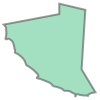

In [65]:
mdf.loc[0, 'geometry']

## Drop "Township"/"City"/etc. suffixes
Except in a few cases, e.g. "Jersey City"

In [10]:
mns[mns.mn == 'Princeton']

,cc,cn,mc,mn,name,type
6153,11,Mercer,14,Princeton,Princeton,<NA>


Preserve these cities' full names

In [11]:
city_stems = [ 'Atlantic', 'Jersey', 'Ocean', 'Union', ]
cities = [ f'{stem} City' for stem in city_stems ]
cities

['Atlantic City', 'Jersey City', 'Ocean City', 'Union City']

In [12]:
city_full_mask = mns.mn.isin(cities)
mns[city_full_mask]

,cc,cn,mc,mn,name,type
41,1,Atlantic,2,Atlantic City,Atlantic,City
3674,5,Cape May,8,Ocean City,Ocean,City
5210,9,Hudson,6,Jersey City,Jersey,City
5294,9,Hudson,10,Union City,Union,City


In [13]:
hills_mask = mns.type == 'Hills'
mns[hills_mask]

,cc,cn,mc,mn,name,type
8382,14,Morris,29,Parsippany-Troy Hills,Parsippany-Troy,Hills


In [14]:
cnn_dupe_mask = mns.duplicated(['cn', 'name'], keep=False)
cnn_dupes = mns[cnn_dupe_mask]
cnn_dupes

,cc,cn,mc,mn,name,type
146,1,Atlantic,7,Egg Harbor City,Egg Harbor,City
167,1,Atlantic,8,Egg Harbor Twp,Egg Harbor,Twp
2004,3,Burlington,3,Bordentown City,Bordentown,City
2025,3,Burlington,4,Bordentown Twp,Bordentown,Twp
2046,3,Burlington,5,Burlington City,Burlington,City
2067,3,Burlington,6,Burlington Twp,Burlington,Twp
2524,3,Burlington,28,Pemberton Boro,Pemberton,Boro
2545,3,Burlington,29,Pemberton Twp,Pemberton,Twp
2875,4,Camden,5,Berlin Boro,Berlin,Boro
2896,4,Camden,6,Berlin Twp,Berlin,Twp


In [15]:
full_name_mask = city_full_mask | hills_mask | cnn_dupe_mask
names = mns.copy()
names.loc[full_name_mask, 'name'] = names.loc[full_name_mask, 'mn']
names = names.drop(columns='mn')
names

,cc,cn,mc,name,type
20,1,Atlantic,1,Absecon,City
41,1,Atlantic,2,Atlantic City,City
62,1,Atlantic,3,Brigantine,City
83,1,Atlantic,4,Buena,Boro
104,1,Atlantic,5,Buena Vista,Twp
...,...,...,...,...,...
11662,21,Warren,19,Phillipsburg,Town
11683,21,Warren,20,Pohatcong,Twp
11704,21,Warren,21,Washington Boro,Boro
11725,21,Warren,22,Washington Twp,Twp


## Build cc2mc2mn dict, write as JSON

In [16]:
def county_obj(df):
    return dict(
        cn=singleton(df.cn.tolist()),
        mc2mn=df.set_index('mc')['name'].to_dict(),
    )
    
cc2mc2mn = (
    names
    .groupby('cc')
    .apply(county_obj)
    .to_dict()
)
cc2mc2mn

{1: {'cn': 'Atlantic',
  'mc2mn': {1: 'Absecon',
   2: 'Atlantic City',
   3: 'Brigantine',
   4: 'Buena',
   5: 'Buena Vista',
   6: 'Corbin',
   7: 'Egg Harbor City',
   8: 'Egg Harbor Twp',
   9: 'Estell Manor',
   10: 'Folsom',
   11: 'Galloway',
   12: 'Hamilton',
   13: 'Hammonton',
   14: 'Linwood',
   15: 'Longport',
   16: 'Margate',
   17: 'Mullica',
   18: 'Northfield',
   19: 'Pleasantville',
   20: 'Port Republic',
   21: 'Somers Point',
   22: 'Ventnor',
   23: 'Weymouth'}},
 2: {'cn': 'Bergen',
  'mc2mn': {1: 'Allendale',
   2: 'Alpine',
   3: 'Bergenfield',
   4: 'Bogota',
   5: 'Carlstadt',
   6: 'Cliffside Park',
   7: 'Closter',
   9: 'Demarest',
   10: 'Dumont',
   11: 'Elmwood Park',
   12: 'East Rutherford',
   13: 'Edgewater',
   14: 'Emerson',
   15: 'Englewood',
   16: 'Englewood Cliffs',
   17: 'Fair Lawn',
   18: 'Fairview',
   19: 'Fort Lee',
   20: 'Franklin Lakes',
   21: 'Garfield',
   22: 'Glen Rock',
   23: 'Hackensack',
   24: 'Harrington Park',
   25:

In [17]:
with open(CC2MC2MN, 'w') as f:
    json.dump(cc2mc2mn, f, indent=2)

## Verify Muni Codes auto-increment within each County

In [20]:
%%time
codes_hist = c.reset_index()[['cc', 'mc']].astype(int).value_counts(sort=False)
codes_hist

CPU times: user 1.75 ms, sys: 804 µs, total: 2.55 ms
Wall time: 1.86 ms


cc  mc
1   1     21
    2     21
    3     21
    4     21
    5     21
          ..
21  19    21
    20    21
    21    21
    22    21
    23    21
Name: count, Length: 568, dtype: int64

In [21]:
def fsck_codes(s):
    l = s.tolist()
    return l == list(range(1, len(l) + 1)), f"{l}"

assert (
    codes_hist
    .reset_index()
    .groupby('cc')
    ['mc']
    .apply(fsck_codes)
).all()